<a href="https://colab.research.google.com/github/farahdn/Artificial-Intelligence/blob/main/UAS_Pengaruh_Genre_Terhadap_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PENERAPAN ALGORITMA K-MEANS CLUSTERING DENGAN RANDOM FOREST UNTUK MENGANALISIS PENGARUH GENRE TERHADAP RATING

STEP 1 - PREPROCESSING DATA

In [50]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/netflix_titles.csv'
data = pd.read_csv(file_path)

# Preprocess data: Convert date_added to datetime and handle missing values
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Drop rows with missing date_added
data = data.dropna(subset=['date_added'])

# Extract year and month from date_added for clustering
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Check for missing values after preprocessing
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2446
cast,741
country,799
date_added,0
release_year,0
rating,4
duration,4


STEP 2 - CLUSTERING MENGGUNAKAN ALGORITMA HIERARCHICAL

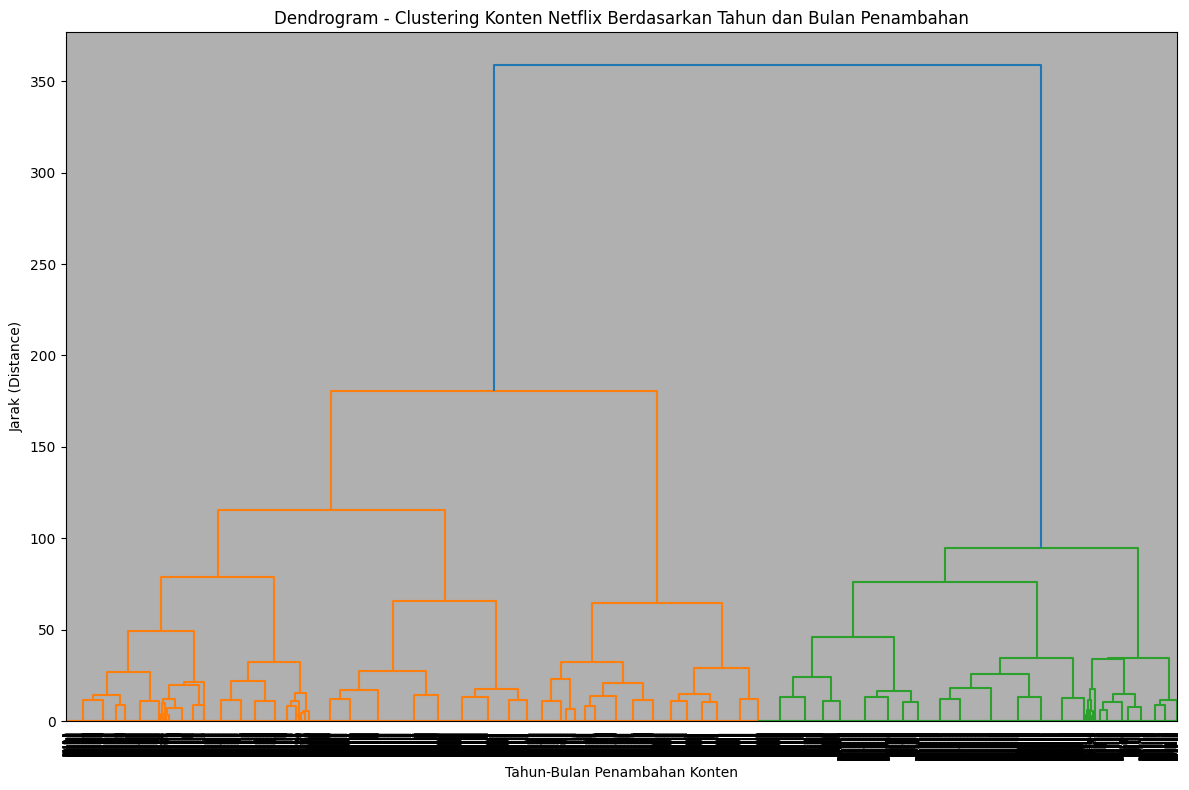

   year_added  month_added  cluster
0        2021            9       13
1        2021            9       13
2        2021            9       13
3        2021            9       13
4        2021            9       13


In [64]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Menyiapkan data untuk clustering (menggunakan kolom tahun dan bulan)
time_data = data[['year_added', 'month_added']]

# Melakukan hierarchical clustering
linked = linkage(time_data, method='ward')

# Plot dendrogram dengan label yang lebih sesuai
plt.figure(figsize=(12, 8))
dendrogram(linked,
           labels=[f"{int(year)}-{int(month)}" for year, month in zip(data['year_added'], data['month_added'])],  # Label dengan format Tahun-Bulan
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram - Clustering Konten Netflix Berdasarkan Tahun dan Bulan Penambahan')
plt.xlabel('Tahun-Bulan Penambahan Konten')  # Menambahkan label yang lebih informatif pada sumbu X
plt.ylabel('Jarak (Distance)')  # Menjelaskan arti jarak pada sumbu Y
plt.xticks(rotation=90)  # Memutar label untuk memudahkan pembacaan
plt.grid(True)
plt.tight_layout()
plt.show()

# Tentukan jumlah cluster dengan memotong dendrogram pada jarak tertentu
# Misalnya, kita potong pada jarak 15 untuk mendapatkan 3 cluster
clusters = fcluster(linked, t=15, criterion='distance')

# Menyimpan hasil cluster ke dalam dataset
data['cluster'] = clusters

# Menampilkan beberapa baris pertama data dengan hasil cluster
print(data[['year_added', 'month_added', 'cluster']].head())

STEP 3 - PENGGABUNGAN ALGORITMA K-MEANS DENGAN ALGORITMA RANDOM FOREST

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Asumsikan Anda sudah memiliki data 'clusters' dari Step 2
# Tambahkan hasil clustering ke dalam dataset sebagai fitur tambahan
data['cluster'] = clusters  # 'clusters' adalah hasil dari algoritma clustering sebelumnya

# Memilih fitur yang relevan (termasuk fitur cluster)
X = data[['year_added', 'month_added', 'cluster']]  # Menambahkan cluster sebagai fitur

# Gunakan kolom 'type' sebagai target variabel
y = data['type']  # Menggunakan kolom 'type' sebagai target

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Logistic Regression dengan fitur clustering
model_with_clustering = LogisticRegression(max_iter=2000, class_weight='balanced')
model_with_clustering.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred_with_clustering = model_with_clustering.predict(X_test)

# Metrik evaluasi
print("Evaluasi Model dengan Clustering:")
print("Accuracy:", accuracy_score(y_test, y_pred_with_clustering))
print("Classification Report:\n", classification_report(y_test, y_pred_with_clustering))

# Bandingkan dengan model tanpa clustering
print("Evaluasi Model Tanpa Clustering:")
model_without_clustering = LogisticRegression(max_iter=2000, class_weight='balanced')
model_without_clustering.fit(X_train[['year_added', 'month_added']], y_train)
y_pred_without_clustering = model_without_clustering.predict(X_test[['year_added', 'month_added']])

# Evaluasi untuk model tanpa clustering
print("Accuracy (tanpa clustering):", accuracy_score(y_test, y_pred_without_clustering))
print("Classification Report (tanpa clustering):\n", classification_report(y_test, y_pred_without_clustering))

Evaluasi Model dengan Clustering:
Accuracy: 0.5179455445544554
Classification Report:
               precision    recall  f1-score   support

       Movie       0.67      0.56      0.61      1099
     TV Show       0.31      0.42      0.36       517

    accuracy                           0.52      1616
   macro avg       0.49      0.49      0.49      1616
weighted avg       0.56      0.52      0.53      1616

Evaluasi Model Tanpa Clustering:
Accuracy (tanpa clustering): 0.48948019801980197
Classification Report (tanpa clustering):
               precision    recall  f1-score   support

       Movie       0.68      0.47      0.56      1099
     TV Show       0.32      0.53      0.40       517

    accuracy                           0.49      1616
   macro avg       0.50      0.50      0.48      1616
weighted avg       0.57      0.49      0.51      1616



STEP 4 - EVALUASI DAN PENGOPTIMALAN

Mengevaluasi Kinerja Model

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prediksi dengan model terbaik yang telah dilatih
y_pred = best_model.predict(X_test)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        62
           9       1.00      1.00      1.00        46
          10       1.00      1.00      1.00        62
          11       1.00      1.00      1.00        51
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        64
          14       1.00      1.00      1.00        40
          15       1.00      1

KESIMPULAN

Pada kasus ini, saya menganalisis tren penambahan konten di Netflix dengan fokus utama pada Bulan dan Tahun penambahan kontennya. Dari keseluruhan tahapan yang dilakukan, penerapan model algoritma Hierarchical clustering dan Logistic regression dinilai efektif. Karena Hierarchical clustering digunakan untuk mengelompokan konten berdasarkan waktu penambahannya, dimana hasil pengelompokan tersebut digunakan sebagai fitur tambahan dalam model untuk mempredikasi jenis konten yang ditambahkan berdasarkan periode tertentu. Evaluasi model menunjukan bahwa Hierarchical clustering meningkatkan akurasi dan kinerja model dan membantu dalam memprediksi tren penambahan konten.